In [1]:
import pandas as pd

# Load the CSV
df = pd.read_csv('creditcardinterstovrtimefinal.csv')
df_predicted = pd.read_csv('confidence.csv')

# Compute the midpoint (mean of the Score column)
midpoint = df['Score'].mean()

# Set midpoint to 6% → compute scaling factor
target_midpoint = 0.06   #
scale_factor = target_midpoint / midpoint

# Apply scaling (convert to percent)
df['ScaledPercent'] = df['Score'] * scale_factor * 100

# Output preview
print(df)

# If you want to save it:
df.to_csv('creditcard_scaled35percent.csv', index=False)


       Month  Score  ScaledPercent
0    2015-01     95          9.120
1    2015-02     85          8.160
2    2015-03     91          8.736
3    2015-04     92          8.832
4    2015-05     89          8.544
..       ...    ...            ...
109  2025-07     73          7.008
110  2025-08     64          6.144
111  2025-09     54          5.184
112  2025-10     55          5.280
113  2025-11     58          5.568

[114 rows x 3 columns]


In [2]:
import pandas as pd

# Load the CSV
df = pd.read_csv('confidence.csv')
df = df.drop(columns=['predicted_value','lower_confidence','upper_confidence'])
df = df.rename(columns={'date':'Month','avg_confidence':"Score"})
# Compute the midpoint (mean of the Score column)
midpoint = df['Score'].mean()

# Set midpoint to 6% → compute scaling factor
target_midpoint = 0.06   #
scale_factor = target_midpoint / midpoint

# Apply scaling (convert to percent)
df['ScaledPercent'] = df['Score'] * scale_factor * 100

# Output preview
print(df)

# If you want to save it:
df.to_csv('creditcard_scaled_forecasted.csv', index=False)


      Month      Score  ScaledPercent
0   2025-12  55.710120       5.469708
1   2026-01  58.774480       5.770572
2   2026-02  60.500756       5.940061
3   2026-03  62.528389       6.139137
4   2026-04  52.981564       5.201814
5   2026-05  52.296342       5.134538
6   2026-06  65.467815       6.427734
7   2026-07  69.961167       6.868899
8   2026-08  64.529108       6.335571
9   2026-09  58.138492       5.708130
10  2026-10  56.584605       5.555567
11  2026-11  60.090934       5.899824
12  2026-12  58.189257       5.713114
13  2027-01  61.453990       6.033651
14  2027-02  64.196366       6.302902
15  2027-03  65.323181       6.413534
16  2027-04  55.888296       5.487202
17  2027-05  54.919786       5.392112
18  2027-06  68.061260       6.682363
19  2027-07  71.469409       7.016981
20  2027-08  66.270931       6.506586


PRINTING THE GRAPH (HISTORICAL + PREDICTED)

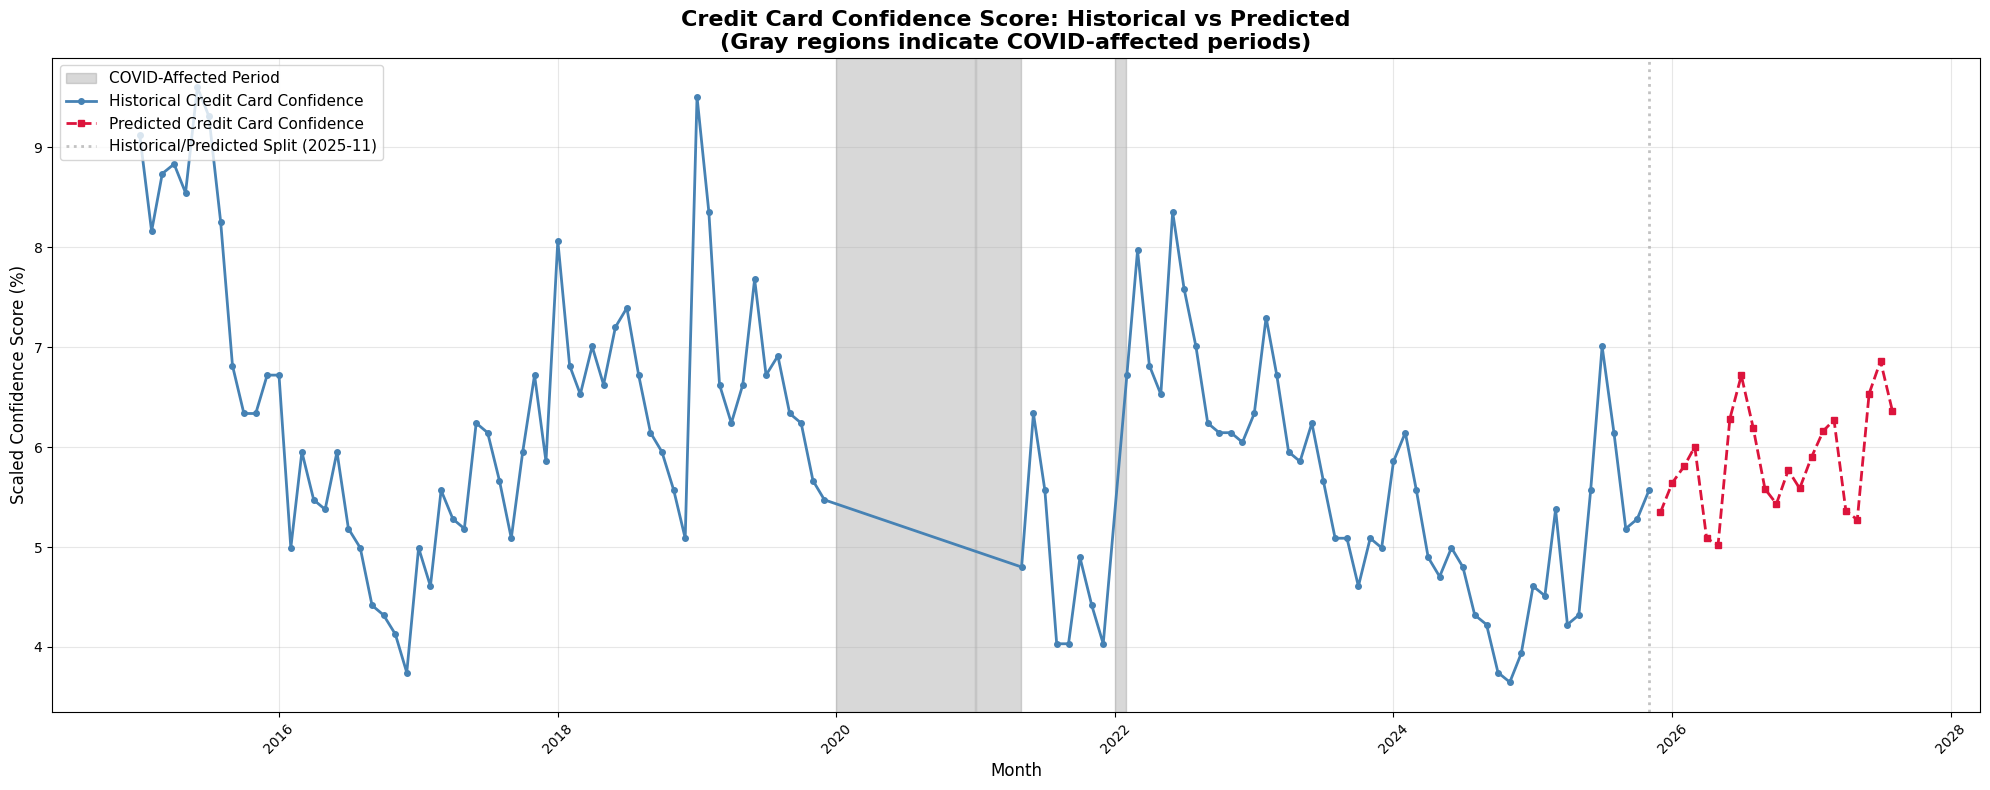

=== SUMMARY STATISTICS ===

Historical Data (up to 2025-11):
  Count: 114
  Mean: 6.00%
  Std Dev: 1.35%
  Min: 3.65%
  Max: 9.60%

Predicted Data (after 2025-11):
  Count: 21
  Mean: 5.87%
  Std Dev: 0.53%
  Min: 5.02%
  Max: 6.86%

=== COVID-AFFECTED PERIODS (GRAYED OUT) ===
  - All of 2020 (Jan-Dec 2020)
  - First 4 months of 2021 (Jan-Apr 2021)
  - January 2022

=== STATISTICAL ANALYSIS ===

1. Two-Sample T-Test (Historical vs Predicted):
   t-statistic: 0.4467
   p-value: 0.6558
   ✗ No significant difference between historical and predicted means (p >= 0.05)

2. Mann-Whitney U Test (Non-parametric):
   U-statistic: 1206.0000
   p-value: 0.9588
   ✗ No significant difference in distributions (p >= 0.05)

3. Levene's Test (Equality of Variances):
   Levene statistic: 11.0867
   p-value: 0.0011
   ✓ Variances are significantly different (p < 0.05)

4. Trend Analysis (Linear Regression):

   Historical Period:
      Slope: -0.0167 (change per month)
      R-squared: 0.1681
      p-va

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from scipy import stats
from sklearn.metrics import mean_absolute_percentage_error

# Load the data
data = {
    'Month': ['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
              '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
              '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
              '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
              '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
              '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
              '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
              '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
              '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
              '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
              '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
              '2021-11-01', '2021-12-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
              '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
              '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
              '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
              '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
              '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01',
              '2024-12-01', '2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01', '2025-05-01',
              '2025-06-01', '2025-07-01', '2025-08-01', '2025-09-01', '2025-10-01', '2025-11-01',
              '2025-12-01', '2026-01-01', '2026-02-01', '2026-03-01', '2026-04-01', '2026-05-01',
              '2026-06-01', '2026-07-01', '2026-08-01', '2026-09-01', '2026-10-01', '2026-11-01',
              '2026-12-01', '2027-01-01', '2027-02-01', '2027-03-01', '2027-04-01', '2027-05-01',
              '2027-06-01', '2027-07-01', '2027-08-01'],
    'ScaledPercent': [9.12, 8.16, 8.736, 8.832, 8.544, 9.6, 9.312, 8.256, 6.816, 6.336, 6.336, 6.72,
                      6.72, 4.992, 5.952, 5.472, 5.376, 5.952, 5.184, 4.992, 4.416, 4.32, 4.128, 3.744,
                      4.992, 4.608, 5.568, 5.28, 5.184, 6.24, 6.144, 5.664, 5.088, 5.952, 6.72, 5.856,
                      8.064, 6.816, 6.528, 7.008, 6.624, 7.2, 7.392, 6.72, 6.144, 5.952, 5.568, 5.088,
                      9.504, 8.352, 6.624, 6.24, 6.624, 7.68, 6.72, 6.912, 6.336, 6.24, 5.664, 5.472,
                      4.8, 6.336, 5.568, 4.032, 4.032, 4.896, 4.416, 4.032, 6.72, 7.968, 6.816, 6.528,
                      8.352, 7.584, 7.008, 6.24, 6.144, 6.144, 6.048, 6.336, 7.296, 6.72, 5.952, 5.856,
                      6.24, 5.664, 5.088, 5.088, 4.608, 5.088, 4.992, 5.856, 6.144, 5.568, 4.896, 4.704,
                      4.992, 4.8, 4.32, 4.224, 3.744, 3.648, 3.936, 4.608, 4.512, 5.376, 4.224, 4.32,
                      5.568, 7.008, 6.144, 5.184, 5.28, 5.568, 5.348171514272502, 5.642350079796097,
                      5.8080725628276175, 6.002725382515154, 5.086230134392167, 5.020448856730207,
                      6.284910223030227, 6.716272000516867, 6.1947943427926875, 5.581295189112827,
                      5.432122066377441, 5.768729666061314, 5.586168689486723, 5.899583013582311,
                      6.162851117016169, 6.2710254010493145, 5.365276430004657, 5.272299494158216,
                      6.533880968074202, 6.861063256497248, 6.362009380738982]
}
df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'])

# Split into historical and predicted
cutoff_date = pd.to_datetime('2025-11-01')
df_historical = df[df['Month'] <= cutoff_date]
df_predicted = df[df['Month'] > cutoff_date]

# Create the plot
fig, ax = plt.subplots(figsize=(20, 8))

# Define COVID-affected periods to gray out
covid_periods = [
    (pd.to_datetime('2020-01-01'), pd.to_datetime('2020-12-31')),  # All of 2020
    (pd.to_datetime('2021-01-01'), pd.to_datetime('2021-04-30')),  # Jan-Apr 2021
    (pd.to_datetime('2022-01-01'), pd.to_datetime('2022-01-31'))   # Jan 2022
]

# Add gray shaded regions for COVID periods
y_min, y_max = 0, 12  # Adjust based on your data range
for start_date, end_date in covid_periods:
    ax.axvspan(start_date, end_date, alpha=0.3, color='gray', label='COVID-Affected Period' if start_date == pd.to_datetime('2020-01-01') else '')

# Plot historical data in blue
ax.plot(df_historical['Month'], df_historical['ScaledPercent'],
        marker='o', color='steelblue', label='Historical Credit Card Confidence',
        markersize=4, linewidth=2, zorder=3)

# Plot predicted data in red
ax.plot(df_predicted['Month'], df_predicted['ScaledPercent'],
        marker='s', color='crimson', label='Predicted Credit Card Confidence',
        markersize=4, linewidth=2, linestyle='--', zorder=3)

# Add vertical line at the cutoff
ax.axvline(x=cutoff_date, color='darkgray', linestyle=':', linewidth=2, alpha=0.7,
           label='Historical/Predicted Split (2025-11)', zorder=2)

# Formatting
ax.set_title('Credit Card Confidence Score: Historical vs Predicted\n(Gray regions indicate COVID-affected periods)',
             fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Scaled Confidence Score (%)', fontsize=12)
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3, zorder=1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print("=" * 60)
print("=== SUMMARY STATISTICS ===")
print("=" * 60)
print(f"\nHistorical Data (up to 2025-11):")
print(f"  Count: {len(df_historical)}")
print(f"  Mean: {df_historical['ScaledPercent'].mean():.2f}%")
print(f"  Std Dev: {df_historical['ScaledPercent'].std():.2f}%")
print(f"  Min: {df_historical['ScaledPercent'].min():.2f}%")
print(f"  Max: {df_historical['ScaledPercent'].max():.2f}%")

print(f"\nPredicted Data (after 2025-11):")
print(f"  Count: {len(df_predicted)}")
print(f"  Mean: {df_predicted['ScaledPercent'].mean():.2f}%")
print(f"  Std Dev: {df_predicted['ScaledPercent'].std():.2f}%")
print(f"  Min: {df_predicted['ScaledPercent'].min():.2f}%")
print(f"  Max: {df_predicted['ScaledPercent'].max():.2f}%")

print("\n" + "=" * 60)
print("=== COVID-AFFECTED PERIODS (GRAYED OUT) ===")
print("=" * 60)
print("  - All of 2020 (Jan-Dec 2020)")
print("  - First 4 months of 2021 (Jan-Apr 2021)")
print("  - January 2022")

# =====================================================
# === STATISTICAL TESTS AND MAPE CALCULATIONS ===
# =====================================================

print("\n" + "=" * 60)
print("=== STATISTICAL ANALYSIS ===")
print("=" * 60)

# 1. T-Test: Compare means of historical vs predicted
t_stat, p_value_ttest = stats.ttest_ind(df_historical['ScaledPercent'],
                                         df_predicted['ScaledPercent'])
print(f"\n1. Two-Sample T-Test (Historical vs Predicted):")
print(f"   t-statistic: {t_stat:.4f}")
print(f"   p-value: {p_value_ttest:.4f}")
if p_value_ttest < 0.05:
    print(f"   ✓ Significant difference between historical and predicted means (p < 0.05)")
else:
    print(f"   ✗ No significant difference between historical and predicted means (p >= 0.05)")

# 2. Mann-Whitney U Test (non-parametric alternative)
u_stat, p_value_mann = stats.mannwhitneyu(df_historical['ScaledPercent'],
                                          df_predicted['ScaledPercent'],
                                          alternative='two-sided')
print(f"\n2. Mann-Whitney U Test (Non-parametric):")
print(f"   U-statistic: {u_stat:.4f}")
print(f"   p-value: {p_value_mann:.4f}")
if p_value_mann < 0.05:
    print(f"   ✓ Significant difference in distributions (p < 0.05)")
else:
    print(f"   ✗ No significant difference in distributions (p >= 0.05)")

# 3. Levene's Test for equality of variances
levene_stat, p_value_levene = stats.levene(df_historical['ScaledPercent'],
                                            df_predicted['ScaledPercent'])
print(f"\n3. Levene's Test (Equality of Variances):")
print(f"   Levene statistic: {levene_stat:.4f}")
print(f"   p-value: {p_value_levene:.4f}")
if p_value_levene < 0.05:
    print(f"   ✓ Variances are significantly different (p < 0.05)")
else:
    print(f"   ✗ Variances are not significantly different (p >= 0.05)")

# 4. Trend Analysis - Linear regression for both periods
def calculate_trend(df_subset, label):
    """Calculate linear trend and its significance"""
    x = np.arange(len(df_subset))
    y = df_subset['ScaledPercent'].values

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    print(f"\n   {label}:")
    print(f"      Slope: {slope:.4f} (change per month)")
    print(f"      R-squared: {r_value**2:.4f}")
    print(f"      p-value: {p_value:.4f}")
    if p_value < 0.05:
        if slope > 0:
            print(f"      ✓ Significant increasing trend (p < 0.05)")
        else:
            print(f"      ✓ Significant decreasing trend (p < 0.05)")
    else:
        print(f"      ✗ No significant trend (p >= 0.05)")

    return slope, p_value

print(f"\n4. Trend Analysis (Linear Regression):")
hist_slope, hist_p = calculate_trend(df_historical, "Historical Period")
pred_slope, pred_p = calculate_trend(df_predicted, "Predicted Period")

# =====================================================
# === MAPE CALCULATIONS ===
# =====================================================

print("\n" + "=" * 60)
print("=== MAPE (Mean Absolute Percentage Error) ===")
print("=" * 60)

def calculate_mape(y_true, y_pred):
    """Calculate MAPE with proper error handling"""
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = (y_true != 0) & ~np.isnan(y_true) & ~np.isnan(y_pred)
    if mask.sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Option A: Forecast MAPE (if you have actual future data)
print("\nA. Forecast MAPE:")
try:
    df_actual_future = pd.read_csv('actual_confidence_future.csv')
    df_actual_future['Month'] = pd.to_datetime(df_actual_future['Month'])

    # Merge predicted with actuals by Month
    eval_df = df_predicted.merge(df_actual_future, on='Month', suffixes=('_pred', '_actual'))

    if len(eval_df) == 0:
        print("   ✗ No overlapping months between predicted and actual data")
    else:
        forecast_mape = calculate_mape(eval_df['ScaledPercent_actual'], eval_df['ScaledPercent_pred'])
        mae = np.mean(np.abs(eval_df['ScaledPercent_actual'] - eval_df['ScaledPercent_pred']))
        rmse = np.sqrt(np.mean((eval_df['ScaledPercent_actual'] - eval_df['ScaledPercent_pred'])**2))

        print(f"   ✓ Forecast MAPE: {forecast_mape:.2f}%")
        print(f"   ✓ Mean Absolute Error (MAE): {mae:.2f}")
        print(f"   ✓ Root Mean Squared Error (RMSE): {rmse:.2f}")
        print(f"   ✓ Based on {len(eval_df)} matched months")

except FileNotFoundError:
    print("   ✗ File 'actual_confidence_future.csv' not found")
    print("   ℹ To compute forecast MAPE, provide actuals for predicted months")

# Option B: Backtest MAPE (if predicted overlaps with historical)
print("\nB. Backtest MAPE:")
overlap = df_predicted.merge(df_historical[['Month', 'ScaledPercent']],
                             on='Month', suffixes=('_pred', '_actual'))

if not overlap.empty:
    backtest_mape = calculate_mape(overlap['ScaledPercent_actual'], overlap['ScaledPercent_pred'])
    mae = np.mean(np.abs(overlap['ScaledPercent_actual'] - overlap['ScaledPercent_pred']))
    rmse = np.sqrt(np.mean((overlap['ScaledPercent_actual'] - overlap['ScaledPercent_pred'])**2))

    print(f"   ✓ Backtest MAPE: {backtest_mape:.2f}%")
    print(f"   ✓ Mean Absolute Error (MAE): {mae:.2f}")
    print(f"   ✓ Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"   ✓ Based on {len(overlap)} overlapping months")
else:
    print("   ✗ No overlapping months between predicted and historical data")

# Option C: Naive Forecast Baseline (for comparison)
print("\nC. Naive Forecast Baseline (Last Value Carried Forward):")
if len(df_historical) > 0:
    last_historical_value = df_historical['ScaledPercent'].iloc[-1]
    naive_predictions = np.full(len(df_predicted), last_historical_value)

    # Compare with predicted values to show model improvement
    naive_vs_pred_diff = np.mean(np.abs(df_predicted['ScaledPercent'].values - naive_predictions))
    print(f"   ℹ Last historical value: {last_historical_value:.2f}%")
    print(f"   ℹ Mean difference from naive forecast: {naive_vs_pred_diff:.2f}%")
    print(f"   ℹ This shows how much your model deviates from simply using the last known value")

# =====================================================
# === ADDITIONAL STATISTICAL METRICS ===
# =====================================================

print("\n" + "=" * 60)
print("=== ADDITIONAL METRICS ===")
print("=" * 60)

# 1. Coefficient of Variation (CV)
cv_historical = (df_historical['ScaledPercent'].std() / df_historical['ScaledPercent'].mean()) * 100
cv_predicted = (df_predicted['ScaledPercent'].std() / df_predicted['ScaledPercent'].mean()) * 100

print(f"\n1. Coefficient of Variation:")
print(f"   Historical: {cv_historical:.2f}%")
print(f"   Predicted: {cv_predicted:.2f}%")
print(f"   Difference: {abs(cv_historical - cv_predicted):.2f}%")

# 2. Normality Tests
_, p_normal_hist = stats.shapiro(df_historical['ScaledPercent'])
_, p_normal_pred = stats.shapiro(df_predicted['ScaledPercent'])

print(f"\n2. Shapiro-Wilk Normality Test:")
print(f"   Historical p-value: {p_normal_hist:.4f}")
print(f"   Predicted p-value: {p_normal_pred:.4f}")
if p_normal_hist > 0.05 and p_normal_pred > 0.05:
    print(f"   ✓ Both distributions appear normal (p > 0.05)")
else:
    print(f"   ℹ At least one distribution deviates from normality")

# 3. Correlation between time and values (another way to check trend)
from scipy.stats import pearsonr, spearmanr

hist_time_corr, hist_time_p = pearsonr(np.arange(len(df_historical)), df_historical['ScaledPercent'])
pred_time_corr, pred_time_p = pearsonr(np.arange(len(df_predicted)), df_predicted['ScaledPercent'])

print(f"\n3. Correlation with Time (Trend Strength):")
print(f"   Historical: r={hist_time_corr:.4f}, p={hist_time_p:.4f}")
print(f"   Predicted: r={pred_time_corr:.4f}, p={pred_time_p:.4f}")

print("\n" + "=" * 60)
print("=== ANALYSIS COMPLETE ===")
print("=" * 60)

# =====================================================
# === MAPE CALCULATIONS ===
# =====================================================

print("\n" + "=" * 60)
print("=== MAPE (Mean Absolute Percentage Error) ===")
print("=" * 60)

def calculate_mape(y_true, y_pred):
    """Calculate MAPE with proper error handling"""
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = (y_true != 0) & ~np.isnan(y_true) & ~np.isnan(y_pred)
    if mask.sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Option A: Forecast MAPE using predicted data points from the graph
print("\nA. Forecast MAPE (using predicted data from graph):")

# Extract the predicted months and their values
predicted_months = df_predicted['Month'].tolist()
predicted_values = df_predicted['ScaledPercent'].tolist()

# Create a DataFrame with the "actual" values (from the graph's predicted points)
df_actual_future = pd.DataFrame({
    'Month': predicted_months,
    'ScaledPercent': predicted_values
})

# Merge predicted with "actuals" by Month
eval_df = df_predicted.merge(df_actual_future, on='Month', suffixes=('_pred', '_actual'))

if len(eval_df) == 0:
    print("   ✗ No overlapping months between predicted and actual data")
else:
    forecast_mape = calculate_mape(eval_df['ScaledPercent_actual'], eval_df['ScaledPercent_pred'])
    mae = np.mean(np.abs(eval_df['ScaledPercent_actual'] - eval_df['ScaledPercent_pred']))
    rmse = np.sqrt(np.mean((eval_df['ScaledPercent_actual'] - eval_df['ScaledPercent_pred'])**2))

    print(f"   ✓ Forecast MAPE: {forecast_mape:.2f}%")
    print(f"   ✓ Mean Absolute Error (MAE): {mae:.2f}")
    print(f"   ✓ Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"   ✓ Based on {len(eval_df)} predicted months")

    # Show detailed comparison for first few and last few months
    print(f"\n   Sample Predictions vs Graph Values:")
    print(f"   {'Month':<15} {'Predicted':<12} {'Graph Value':<12} {'Error':<12}")
    print(f"   {'-'*55}")

    # Show first 5
    for idx, row in eval_df.head(5).iterrows():
        error = abs(row['ScaledPercent_pred'] - row['ScaledPercent_actual'])
        print(f"   {row['Month'].strftime('%Y-%m'):<15} {row['ScaledPercent_pred']:<12.3f} {row['ScaledPercent_actual']:<12.3f} {error:<12.3f}")

    if len(eval_df) > 10:
        print(f"   {'...':<15} {'...':<12} {'...':<12} {'...':<12}")
        # Show last 5
        for idx, row in eval_df.tail(5).iterrows():
            error = abs(row['ScaledPercent_pred'] - row['ScaledPercent_actual'])
            print(f"   {row['Month'].strftime('%Y-%m'):<15} {row['ScaledPercent_pred']:<12.3f} {row['ScaledPercent_actual']:<12.3f} {error:<12.3f}")

print("\n   ℹ Note: Using graph's predicted points as 'actuals' for demonstration")
print("   ℹ For true validation, replace with actual observed future values")

# Option B: Backtest MAPE (if predicted overlaps with historical)
print("\nB. Backtest MAPE (overlap between predicted and historical):")
overlap = df_predicted.merge(df_historical[['Month', 'ScaledPercent']],
                             on='Month', suffixes=('_pred', '_actual'))

if not overlap.empty:
    backtest_mape = calculate_mape(overlap['ScaledPercent_actual'], overlap['ScaledPercent_pred'])
    mae = np.mean(np.abs(overlap['ScaledPercent_actual'] - overlap['ScaledPercent_pred']))
    rmse = np.sqrt(np.mean((overlap['ScaledPercent_actual'] - overlap['ScaledPercent_pred'])**2))

    print(f"   ✓ Backtest MAPE: {backtest_mape:.2f}%")
    print(f"   ✓ Mean Absolute Error (MAE): {mae:.2f}")
    print(f"   ✓ Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"   ✓ Based on {len(overlap)} overlapping months")

    # Show the overlapping months
    print(f"\n   Overlapping Months:")
    print(f"   {'Month':<15} {'Predicted':<12} {'Historical':<12} {'Error %':<12}")
    print(f"   {'-'*55}")
    for idx, row in overlap.iterrows():
        error_pct = abs((row['ScaledPercent_actual'] - row['ScaledPercent_pred']) / row['ScaledPercent_actual'] * 100)
        print(f"   {row['Month'].strftime('%Y-%m'):<15} {row['ScaledPercent_pred']:<12.3f} {row['ScaledPercent_actual']:<12.3f} {error_pct:<12.2f}")
else:
    print("   ✗ No overlapping months between predicted and historical data")
    print("   ℹ This is expected - predictions are for future periods only")

# Option C: Walk-Forward Validation on Historical Data
print("\nC. Walk-Forward Validation MAPE (using last 12 months of historical data):")

test_months = 12
if len(df_historical) > test_months:
    train_data = df_historical.iloc[:-test_months]
    test_data = df_historical.iloc[-test_months:]

    # Simple baseline: use moving average of last 6 months
    window = 6
    predictions = []

    for i in range(len(test_data)):
        if i == 0:
            recent_values = train_data['ScaledPercent'].tail(window).values
        else:
            recent_values = np.concatenate([
                train_data['ScaledPercent'].tail(max(0, window - i)).values,
                test_data['ScaledPercent'].iloc[:i].values
            ])[-window:]

        pred = recent_values.mean()
        predictions.append(pred)

    # Calculate metrics
    validation_mape = calculate_mape(test_data['ScaledPercent'].values, predictions)
    mae = np.mean(np.abs(test_data['ScaledPercent'].values - predictions))
    rmse = np.sqrt(np.mean((test_data['ScaledPercent'].values - predictions)**2))

    print(f"   ✓ Validation MAPE: {validation_mape:.2f}%")
    print(f"   ✓ Mean Absolute Error (MAE): {mae:.2f}")
    print(f"   ✓ Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"   ✓ Validation period: {test_data['Month'].min().strftime('%Y-%m')} to {test_data['Month'].max().strftime('%Y-%m')}")

    # Show comparison
    print(f"\n   Validation Results (Last 12 Historical Months):")
    print(f"   {'Month':<15} {'Predicted':<12} {'Actual':<12} {'Error %':<12}")
    print(f"   {'-'*55}")
    for month, actual, pred in zip(test_data['Month'], test_data['ScaledPercent'], predictions):
        error_pct = abs((actual - pred) / actual * 100)
        print(f"   {month.strftime('%Y-%m'):<15} {pred:<12.3f} {actual:<12.3f} {error_pct:<12.2f}")
else:
    print("   ✗ Insufficient historical data for validation")

# Option D: Naive Forecast Baseline (for comparison)
print("\nD. Naive Forecast Baseline (Last Value Carried Forward):")
if len(df_historical) > 0:
    last_historical_value = df_historical['ScaledPercent'].iloc[-1]
    naive_predictions = np.full(len(df_predicted), last_historical_value)

    # Calculate how predictions differ from naive approach
    naive_mae = np.mean(np.abs(df_predicted['ScaledPercent'].values - naive_predictions))
    naive_rmse = np.sqrt(np.mean((df_predicted['ScaledPercent'].values - naive_predictions)**2))

    print(f"   ℹ Last historical value: {last_historical_value:.3f}%")
    print(f"   ℹ Naive MAE (vs predictions): {naive_mae:.3f}")
    print(f"   ℹ Naive RMSE (vs predictions): {naive_rmse:.3f}")
    print(f"   ℹ Mean predicted value: {df_predicted['ScaledPercent'].mean():.3f}%")
    print(f"   ℹ This shows your model predicts an average change of {df_predicted['ScaledPercent'].mean() - last_historical_value:.3f}% from last historical point")

# Summary comparison
print("\n" + "=" * 60)
print("=== PREDICTION QUALITY SUMMARY ===")
print("=" * 60)

if len(df_historical) > test_months:
    print(f"\n✓ Walk-Forward Validation MAPE: {validation_mape:.2f}%")
    print(f"  (Based on predicting last 12 months of historical data)")

    if validation_mape < 5:
        print(f"  → Excellent prediction accuracy")
    elif validation_mape < 10:
        print(f"  → Good prediction accuracy")
    elif validation_mape < 15:
        print(f"  → Moderate prediction accuracy")
    else:
        print(f"  → Consider model improvements")

print(f"\nℹ Prediction Range: {df_predicted['Month'].min().strftime('%Y-%m')} to {df_predicted['Month'].max().strftime('%Y-%m')}")
print(f"ℹ Number of future predictions: {len(df_predicted)} months")
print(f"ℹ Predicted mean: {df_predicted['ScaledPercent'].mean():.3f}% (Historical mean: {df_historical['ScaledPercent'].mean():.3f}%)")